In [1]:
# import the libraries for the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the dataset

df = pd.read_excel('cleaned_cars_review.xlsx')

df.head()

,Author_Name,Vehicle_Title,Review_Title,Review,Rating,Date
0,Garrett Stites,2015 Ferrari 458 Italia Convertible Spider 2dr...,The best car around!,This car gets great gas mileage and is the be...,5.00,2017-04-28
1,debu99,2006 Ferrari 612 Scaglietti Coupe F1 2dr Coupe...,keeps on beeing just great,Owning the 612 now over 3 years and using it ...,4.75,2011-11-19
2,Arnell Baylet,2006 Ferrari 612 Scaglietti Coupe F1 2dr Coupe...,"Incredible Ride, Sticker Shock, Low MPG",Best controllable acceleration ever witnessed...,5.00,2007-06-28
3,gregMTU,2006 Ferrari 612 Scaglietti Coupe F1 2dr Coupe...,612 Scag The Best!,The engine is strong pulling right up to 7000...,5.00,2007-05-30
4,Darrel McOnnery,2006 Ferrari 612 Scaglietti Coupe 2dr Coupe (5...,612 Scaglietti! Quietly the Best Ferrari Ever!,"This car, the 612 Scaglietti, is overlooked ...",5.00,2007-01-21


In [3]:
df.dtypes

Author_Name              object
Vehicle_Title            object
Review_Title             object
Review                   object
Rating                  float64
Date             datetime64[ns]
dtype: object

In [4]:
df.isnull().sum()

Author_Name      0
Vehicle_Title    0
Review_Title     1
Review           0
Rating           0
Date             0
dtype: int64

In [5]:
# drop the null values

df.dropna(inplace=True)

In [6]:
df.reset_index(drop=True, inplace=True)

<AxesSubplot:>

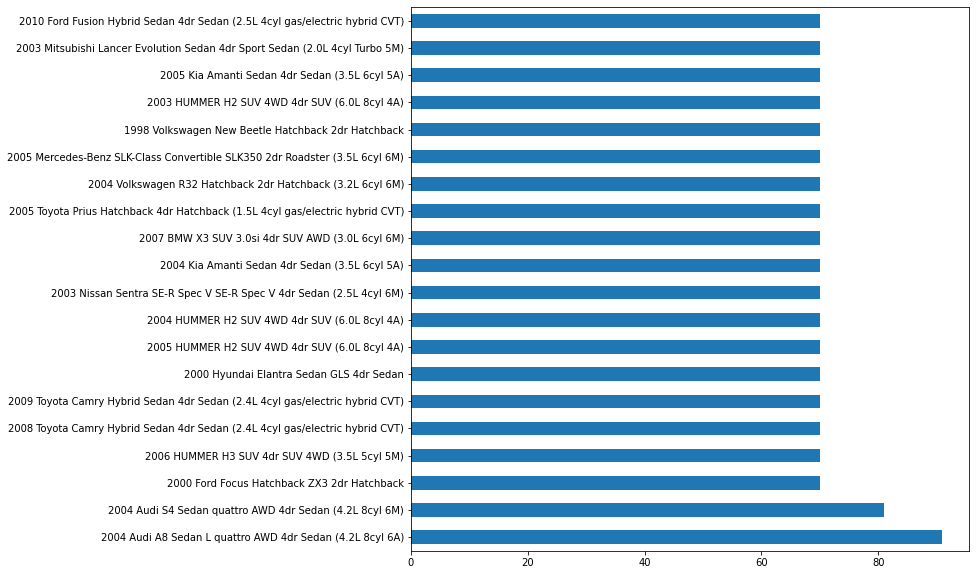

In [10]:
# now let's check the value counts of the categorical columns

df['Vehicle_Title'].value_counts().head(20).plot(kind='barh', figsize=(10, 10))

<AxesSubplot:ylabel='Vehicle_Title'>

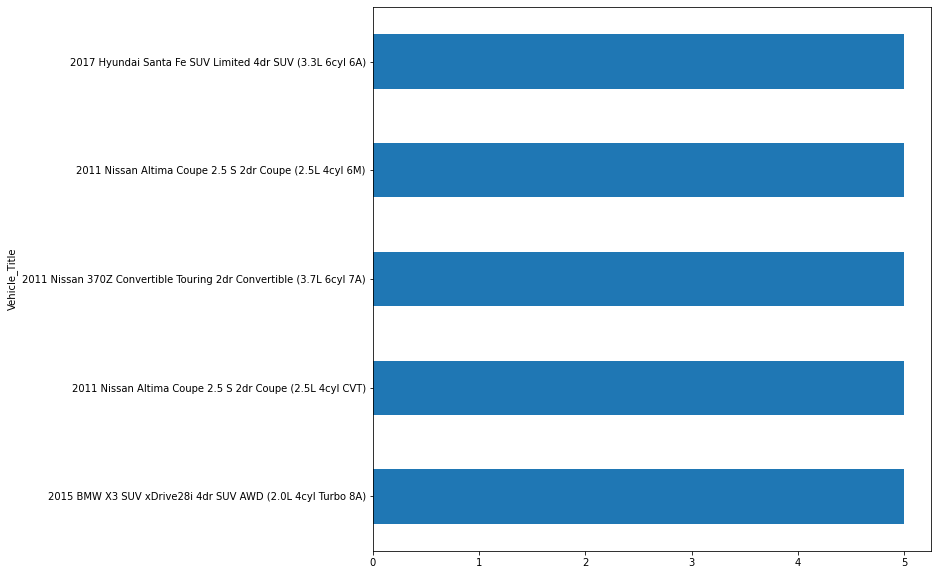

In [14]:
# now let's check the vehicle title with the highest rating

df.groupby('Vehicle_Title')['Rating'].mean().sort_values(ascending=False).head(5).plot(kind='barh', figsize=(10, 10))

<AxesSubplot:ylabel='Vehicle_Title'>

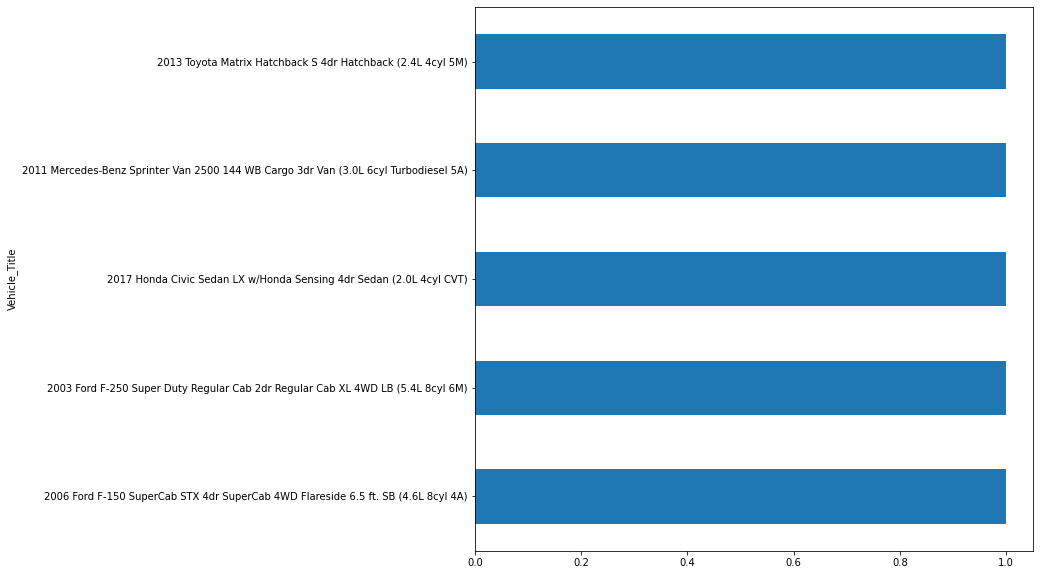

In [15]:
# now let's check the vehicle title with the lowest rating

df.groupby('Vehicle_Title')['Rating'].mean().sort_values(ascending=True).head(5).plot(kind='barh', figsize=(10, 10))

In [16]:
df.columns

Index(['Author_Name', 'Vehicle_Title', 'Review_Title', 'Review', 'Rating',
       'Date'],
      dtype='object')

<AxesSubplot:>

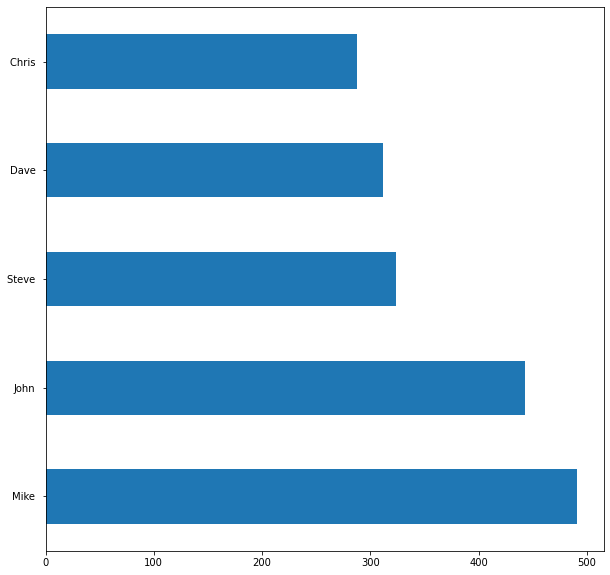

In [22]:
# now let's check the value counts of the author name   

df['Author_Name'].value_counts(sort=True, ascending=False).head(5).plot(kind='barh', figsize=(10, 10))

<AxesSubplot:ylabel='Author_Name'>

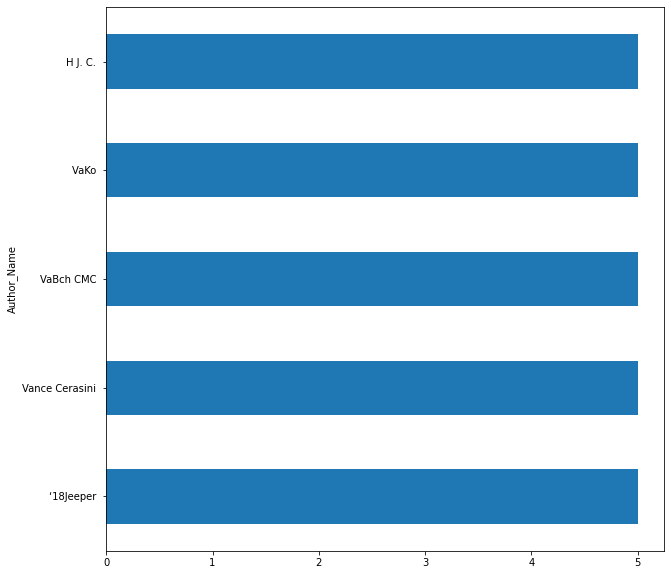

In [25]:
# now let's check the author name with the highest rating

df.groupby('Author_Name')['Rating'].mean().sort_values(ascending=False).head(5).plot(kind='barh', figsize=(10, 10))

In [26]:
# now let's check the length of the review

df['Review_Length'] = df['Review'].apply(len)

In [27]:
df.head()

,Author_Name,Vehicle_Title,Review_Title,Review,Rating,Date,Review_Length
0,Garrett Stites,2015 Ferrari 458 Italia Convertible Spider 2dr...,The best car around!,This car gets great gas mileage and is the be...,5.00,2017-04-28,67
1,debu99,2006 Ferrari 612 Scaglietti Coupe F1 2dr Coupe...,keeps on beeing just great,Owning the 612 now over 3 years and using it ...,4.75,2011-11-19,193
2,Arnell Baylet,2006 Ferrari 612 Scaglietti Coupe F1 2dr Coupe...,"Incredible Ride, Sticker Shock, Low MPG",Best controllable acceleration ever witnessed...,5.00,2007-06-28,266
3,gregMTU,2006 Ferrari 612 Scaglietti Coupe F1 2dr Coupe...,612 Scag The Best!,The engine is strong pulling right up to 7000...,5.00,2007-05-30,172
4,Darrel McOnnery,2006 Ferrari 612 Scaglietti Coupe 2dr Coupe (5...,612 Scaglietti! Quietly the Best Ferrari Ever!,"This car, the 612 Scaglietti, is overlooked ...",5.00,2007-01-21,322


<AxesSubplot:ylabel='Author_Name'>

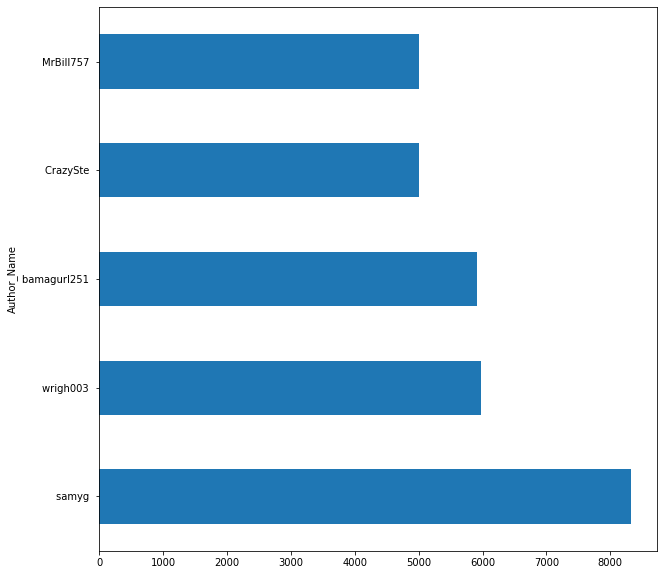

In [29]:
# now let's check the author name with the highest review length

df.groupby('Author_Name')['Review_Length'].mean().sort_values(ascending=False).head(5).plot(kind='barh', figsize=(10, 10))

In [30]:
# now let's check the average rating 

df['Rating'].mean()

4.293891704978584

In [44]:
# check the content of the review with the highest rating

df[df['Rating'] == 1.0]['Review'].iloc[0]

" I got this car after trading in my Nissan Maxima. Dealer said it was a great car reliable good on gas so forth. After having a car for less than 6 weeks the car completely shut off on the interstate. The brake locked car would not start. Take it to the dealership dealership has a minute to diagnose it. They tried to say it was an electrical problem. And truth I don't think they know. Now they're saying the engine has locked up. No problems with car until I had an oil change. If I were you I would not get this car. This car needs to be recalled. It is a safety hazard to anyone and their family. It will shut off at high speeds. Will not start and horrible weather. What's even worse is Chrysler will not own up to the fact that this is not a great car this car is deadly. I almost lost my life. Sat in 90 degree weather until a tow truck came to get me and the car. Was not even offered a rental car. Please do yourself a favor and do not get this car."

In [45]:
# now save the cleaned dataset for sentiment analysis

df.to_excel('cleaned_cars_review.xlsx', index=False)